In [145]:
import pandas as pd

# there is Irish in there, so use latin-1
data = pd.read_csv('DCC_DublincityRoadsandStreets.csv', encoding='latin-1')

# only interested in node: street name, edges: (road_start, road_finish)
data = data[['street_name', 'road_start', 'road_finish']]

# drop rows containing any blanks
data.dropna(inplace=True)

In [146]:
# Check for duplicates - see ABBEYFIELD
data.groupby('street_name').count().head(10)

,road_start,road_finish
street_name,,
ABBEY STREET LOWER,1,1
ABBEY STREET MIDDLE,1,1
ABBEY STREET UPPER,1,1
ABBEYFIELD,2,2
ABBOTSTOWN AVENUE,1,1
ABBOTSTOWN ROAD,1,1
ABERCORN ROAD,1,1
ABERDEEN STREET,1,1
ACCOMMODATION WALK,6,6


In [147]:
# drop all the duplicates - don't keep either
data.drop_duplicates('street_name', keep=False, inplace=True)

In [148]:
# ABBEYFIELD is gone
data.groupby('street_name').count().head(10)

,road_start,road_finish
street_name,,
ABBEY STREET LOWER,1,1
ABBEY STREET MIDDLE,1,1
ABBEY STREET UPPER,1,1
ABBOTSTOWN AVENUE,1,1
ABBOTSTOWN ROAD,1,1
ABERCORN ROAD,1,1
ABERDEEN STREET,1,1
ADAIR LANE,1,1
ADARE AVENUE,1,1


In [149]:
data.head(10)

,street_name,road_start,road_finish
1,ABBEY STREET LOWER,O'CONNELL ST.,BERESFORD PLACE
2,ABBEY STREET MIDDLE,LR. LIFFEY STREET,O'CONNELL STREET
3,OLD ABBEY STREET,BERESFORD PLACE,MARLBOROUGH STREET
4,ABBEY STREET UPPER,CAPEL ST,LOWER LIFFEY STREET
8,ABBOTSTOWN AVENUE,CARDIFFBRIDGE RD,RATOATH ROAD
10,ABBOTSTOWN ROAD,CAPPAGH RD,RATOATH AVE.
11,ABERCORN ROAD,SHERRIFF ST.,IRVINE TCE.
13,ABERDEEN STREET,INFIRMARY RD.,FINDLATER ST.
17,ADAIR LANE,PRICES LANE,ASTON PLACE
19,ADARE AVENUE,ADARE RD.,BUNRATTY ROAD


In [159]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
counter = 0
for row in data.itertuples():
    counter+=1
    if(counter >100):
        break
    node = row[0]
    G.add_node(node)

    edge = (row[1], row[2])
    G.add_edge(*edge)
    

In [160]:
G.number_of_edges()

100

In [161]:
nx.draw(G, with_labels=True, arrows=True)

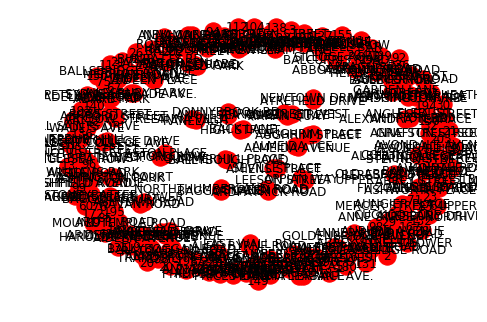

In [162]:
plt.show()